<a href="https://colab.research.google.com/github/nalinapk/Carpe_diem/blob/master/Practical_Ex07_PickTheCodeChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# visualize multiple years with a basemap, and export GeoJSON.

***Installs the necessary Python libraries (GeoPandas, Shapely, scikit-learn, Matplotlib, and Contextily) in Colab so the notebook can read/merge geospatial data, do geometry ops, plot maps, and add web basemaps.***

In [12]:
# Install required packages
!pip install geopandas shapely scikit-learn matplotlib contextily

***This line imports Colab’s built-in files module, which lets you easily upload or download files between your local computer and the Colab runtime.***

In [13]:
from google.colab import files

***This line imports the GeoPandas library and gives it the short alias gpd, so you can work with geospatial data (like shapefiles, GeoJSON) in table form similar to pandas.***

In [14]:
import geopandas as gpd

***world_pop = gpd.read_file("...shp") → uses GeoPandas’ read_file to load the shapefile into a GeoDataFrame (world_pop) containing attributes and geometry of world boundaries.***

***world_pop.head() → displays the first five rows of the GeoDataFrame so you can preview the data (columns, values, geometries).***

In [15]:
# Replace with your actual .shp filename
world_pop = gpd.read_file("/content/world admin boundaries/world-administrative-boundaries-countries.shp")
# Preview the data
world_pop.head()

,iso3_code,iso2_code,preferred_t,english_sho,french_shor,spanish_sho,russian_sho,chinese_sho,arabic_shor,region_code,region_name,sub_region_,sub_region_,geometry
0,EST,EE,Estonia,Estonia,Estonie (l') [fém.],Estonia,Эстония,爱沙尼亚,إستونيا,150,Europe,Northern Europe,Northern Europe,"MULTIPOLYGON (((22.98485 58.59944, 23.09083 58..."
1,IRQ,IQ,Iraq,Iraq,Iraq (l') [masc.],Iraq (el),Ирак,伊拉克,العراق,142,Asia,Western Asia,Western Asia,"POLYGON ((44.78734 37.14971, 44.76617 37.11228..."
2,AFG,AF,Afghanistan,Afghanistan,Afghanistan (l') [masc.],Afganistán (el),Афганистан,阿富汗,أفغانستان,142,Asia,Southern Asia,Southern Asia,"POLYGON ((74.91574 37.23733, 74.80873 37.22423..."
3,ABW,AW,Aruba,Aruba,None,None,None,None,None,19,Americas,Latin America and the Caribbean,Latin America and the Caribbean,"POLYGON ((-69.87486 12.41528, -69.88224 12.411..."
4,ERI,ER,Eritrea,Eritrea,Érythrée (l') [fém.],Eritrea,Эритрея,厄立特里亚,إريتريا,2,Africa,Sub-Saharan Africa,Sub-Saharan Africa,"MULTIPOLYGON (((40.13583 15.7525, 40.12861 15...."


***CSV = gpd.read_file("...world_population.csv") → tries to load the population CSV file into a GeoDataFrame.***

***CSV.head() → shows the first five rows of the loaded table so you can quickly inspect the population data (columns, years, values).***

In [16]:
# 4) Read CSV
CSV = gpd.read_file("/content/world admin boundaries/world_population.csv")
CSV.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.01,0


***This code normalizes selected population and density features, applies KMeans clustering (5 groups), and plots countries colored by their assigned cluster.***

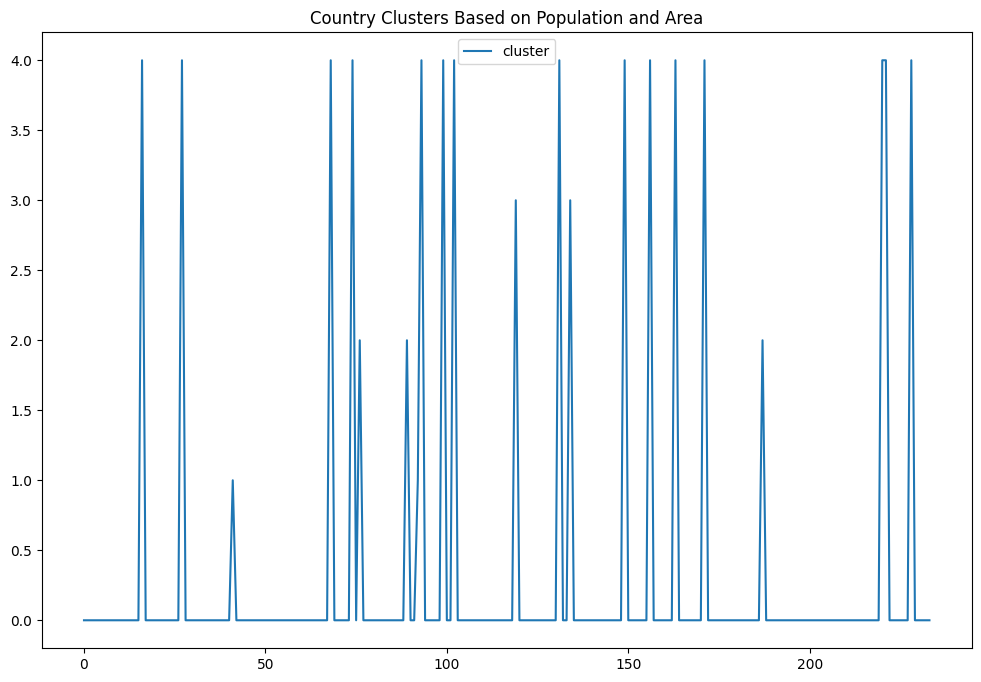

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features
X = CSV[['2000 Population', '1980 Population', '1970 Population', 'Density (per km²)']].dropna()

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
CSV['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
CSV.plot(column='cluster', legend=True, figsize=(12, 8))
plt.title("Country Clusters Based on Population and Area")
plt.show()

***Loads the shapefile and CSV, prints their columns, removes duplicate columns, merges them on ISO3 codes (iso3_code ↔ CCA3), and saves the joined layer as a new shapefile.***

In [18]:
import pandas as pd

# Paths
shapefile_path = "/content/world admin boundaries/world-administrative-boundaries-countries.shp"   # replace with your shapefile path
csv_path = "/content/world admin boundaries/world_population.csv"

# 1. Load shapefile
gdf = gpd.read_file("/content/world admin boundaries/world-administrative-boundaries-countries.shp")
# 2. Load CSV
df = pd.read_csv("/content/world admin boundaries/world_population.csv")
# Print columns of df to diagnose KeyError
print("Columns in df (CSV DataFrame):")
print(df.columns)

# Drop the duplicate 'sub_region_' column from the CSV dataframe
# df = df.drop(columns=['sub_region_']) # Removed this line

# Print columns of gdf to diagnose potential duplicates
print("\nColumns in gdf (GeoDataFrame):")
print(gdf.columns)

# Drop one of the duplicate 'sub_region_' columns from gdf
gdf = gdf.loc[:,~gdf.columns.duplicated()]

# 3. Perform join on ISO3 code
#    (make sure both columns are strings and have same format)
gdf = gdf.merge(df, left_on="iso3_code", right_on="CCA3", how="left")

# 4. Save to new shapefile or GeoPackage
gdf.to_file("world_population_joined.shp")    # ESRI Shapefile
# or better:
# gdf.to_file("world_population_joined.gpkg", driver="GPKG")

print("Join complete! New file saved.")
print(gdf.head())

Columns in df (CSV DataFrame):
Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

Columns in gdf (GeoDataFrame):
Index(['iso3_code', 'iso2_code', 'preferred_t', 'english_sho', 'french_shor',
       'spanish_sho', 'russian_sho', 'chinese_sho', 'arabic_shor',
       'region_code', 'region_name', 'sub_region_', 'sub_region_', 'geometry'],
      dtype='object')
Join complete! New file saved.
  iso3_code iso2_code  preferred_t  english_sho               french_shor  \
0       EST        EE      Estonia      Estonia       Estonie (l') [fém.]   
1       IRQ        IQ         Iraq         Iraq         Iraq (l') [masc.]   
2       AFG        AF  Afghanistan  Afghanistan  Afghanistan (l') [masc.]   

/tmp/ipython-input-101822928.py:30: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("world_population_joined.shp")    # ESRI Shapefile
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'preferred_t' to 'preferred_'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'english_sho' to 'english_sh'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'french_shor' to 'french_sho'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'spanish_sho' to 'spanish_sh'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'russian_sho' to 'russian_sh'
  ogr_write(
/usr/local/lib/python3.12/dist-packages

***This line imports two libraries:***

***matplotlib.pyplot as plt → gives you plotting functions (used for drawing maps, charts, and customizing layouts).***

***contextily as ctx → lets you add web basemaps (like OpenStreetMap tiles) underneath your GeoPandas plots after reprojecting data to EPSG:3857.***

***In short: it prepares tools to plot maps and overlay them with real-world basemaps.***

In [19]:
import matplotlib.pyplot as plt
import contextily as ctx

In [20]:
#Convert to Web Mercator projection (for basemap)
gdf_web = gdf.to_crs(epsg=4326)

***We are making separate maps for the three years.***

***ax1 = gdf_web.plot(column='2000 Population', cmap='tab10', legend=True, figsize=(12, 6)) → draws a choropleth from gdf_web using the 2000 Population field, with a categorical-style colormap, legend, and 12×6 figure size.***

***ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik) → adds an OpenStreetMap basemap under the polygons (requires gdf_web to be in EPSG:3857).***

***plt.title("World Population (2000)") → sets the map title.***

***plt.axis('off') → hides axis ticks/frames for a clean map.***

***plt.show() → renders the figure in the notebook.***

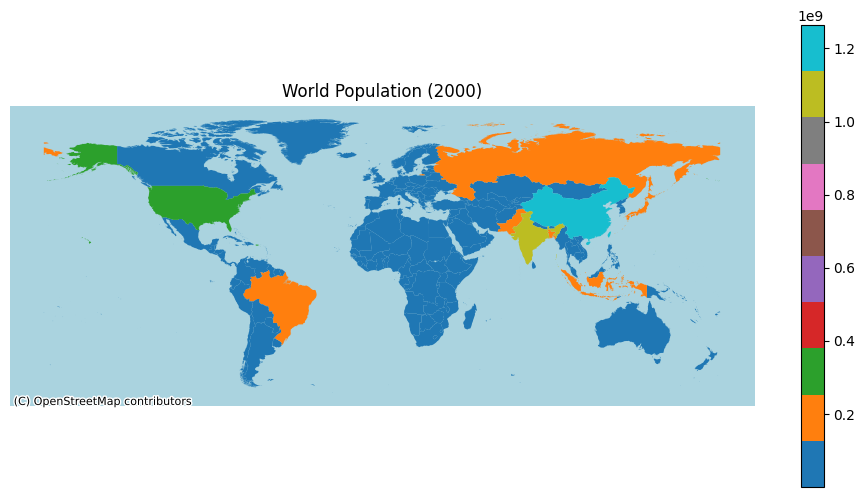

In [21]:
#  Create 3 Separate Maps for 2000, 1980, and 1970
# --- 2000 Population ---
ax1 = gdf_web.plot(column='2000 Population', cmap='tab10', legend=True, figsize=(12, 6))
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("World Population (2000)")
plt.axis('off')
plt.show()

***This block makes a choropleth map of the 1980 Population values, adds an OpenStreetMap basemap, titles it, hides axes, and displays the figure***

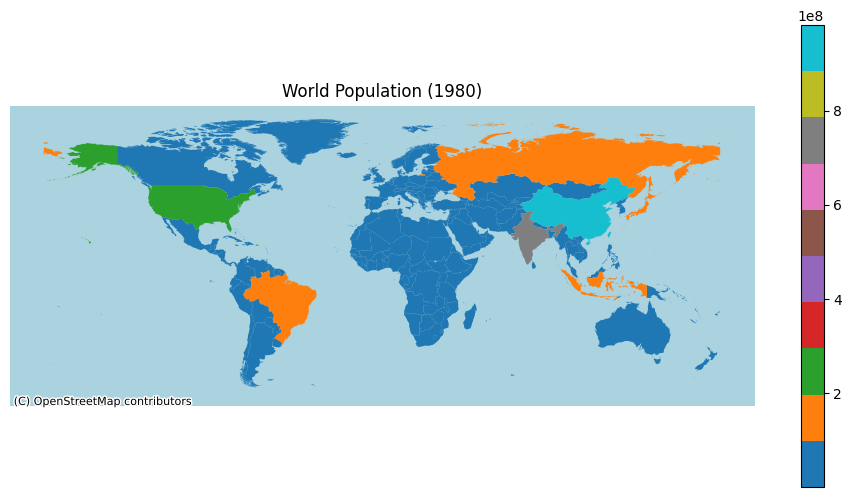

In [22]:
# --- 1980 Population ---
ax2 = gdf_web.plot(column='1980 Population', cmap='tab10', legend=True, figsize=(12, 6))
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("World Population (1980)")
plt.axis('off')
plt.show()

***This code plots the 1970 Population data as a choropleth map on world boundaries, overlays it with an OpenStreetMap basemap, adds a title, hides axes, and displays the map.***

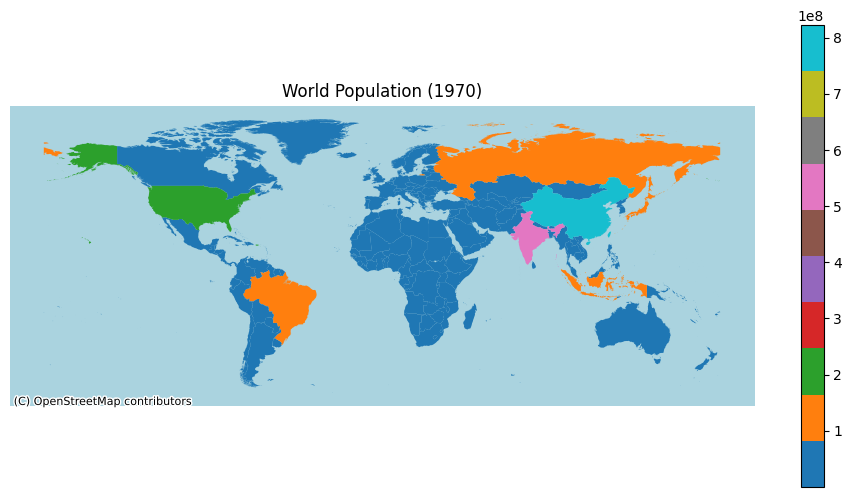

In [23]:
# --- 1970 Population ---
ax2 = gdf_web.plot(column='1970 Population', cmap='tab10', legend=True, figsize=(12, 6))
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("World Population (1970)")
plt.axis('off')
plt.show()